# Exercise 1 
>
    1. Using Kneighbors Classifier to achieve 97% accuracy on the test set 


In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [40]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import (confusion_matrix, precision_score, 
                             recall_score, f1_score,
                             precision_recall_curve,
                             roc_curve,
                             roc_auc_score,
                             accuracy_score
                            )

plt.style.use('seaborn')

# Loading the data

In [6]:
def load_data():
    mnist = fetch_openml('mnist_784', version=1)
    return mnist

mnist = load_data()

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

Since the dataset has being cleaned, splitting into train and test set would be the next thin g to do.
NOTE : The model would be ran on a subset of the data 

# Splitting  the data

In [8]:
X, y = mnist['data'], mnist['target']
y = y.astype(np.int32)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

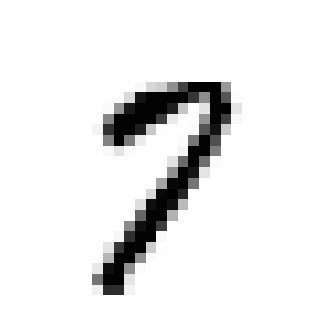

In [10]:
plt.imshow(X_train[10000-1].reshape(28, 28))
plt.axis('off')
plt.show()

In [11]:
y[10000-1]

7

# Building a model

In [12]:
X_train_sub = X_train[:10000].copy()
y_train_sub = y_train[:10000].copy()
X_test_sub = X_test[:10000].copy()
y_test_sub = y_test[:10000].copy()

In [13]:
# first model
knn = KNeighborsClassifier().fit(X_train_sub, y_train_sub)
scores = knn.score(X_train_sub, y_train_sub)

print(f'Score of the first model : {scores} %')

Score of the first model : 0.9669 %


In [14]:
y_preds = knn.predict(X_train_sub)

In [15]:
cross_score = cross_val_score(knn, X_train_sub, y_train_sub, cv=3, scoring='accuracy')
print(cross_score)

[0.93491302 0.94269427 0.9219922 ]


### Confusin matrix

In [16]:
y_preds_score = cross_val_predict(knn, X_train_sub, y_train_sub, cv=3, n_jobs=-1)
conf_mat = confusion_matrix(y_train_sub, y_preds_score)

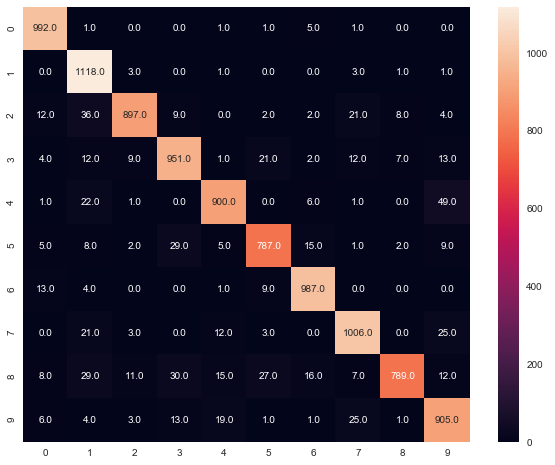

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(conf_mat, annot=True, fmt='.1f')
plt.show()

In [18]:
precision_score(y_train_sub, y_preds_score, average=None)

array([0.95292988, 0.89083665, 0.96555436, 0.92151163, 0.94240838,
       0.92479436, 0.95454545, 0.93407614, 0.97648515, 0.88899804])

In [19]:
y_pred = cross_val_predict(knn, X_train_sub, y_train_sub, cv=3,
                           n_jobs=-1, method='predict_proba')
y_preds_pos = y_pred[:, 1]

In [20]:
recall_score(y_train_sub, y_preds_score, average=None)


array([0.99100899, 0.9920142 , 0.90514632, 0.92151163, 0.91836735,
       0.91193511, 0.97337278, 0.94018692, 0.83580508, 0.92535787])

In [28]:
grid_param = {
    'n_neighbors':[10, 25, 50, 100],
    'weights' :['uniform','distance']
}

grid_model = GridSearchCV(knn, param_grid=grid_param, 
                          scoring='accuracy', cv=3, n_jobs=-1)
grid_model.fit(X_train_sub, y_train_sub)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [10, 25, 50, 100],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [29]:
grid_model.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [30]:
grid_model.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [35]:
final_model = grid_model.best_estimator_
final_model.fit(X_test_sub, y_test_sub)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [38]:
score = final_model.score(X_test_sub, y_test_sub)
print(score)

1.0


In [39]:
y_preds = final_model.predict(X_test_sub)

In [41]:
accuracy_score(y_test_sub, y_preds)

1.0